In [1]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
import funciones_dinamica as fd
import glob
import xarray as xr

In [2]:
from scipy.signal import filtfilt
def PasaBajos(senal):
    """Aplica un filtro butterworth
    entrada: senial (np.array)
    salida: senial filtrada (np.array)
    """
    fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
    frec_c = 1.2 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
    nyq = .5*fs #Nysquits para pasarle al filtro
    frec = frec_c / nyq 
    orden = 6
    b,a = scipy.signal.butter(orden,frec,'low',analog=False,output='ba') #Filtro butterworth
    y = scipy.signal.filtfilt(b,a,senal,axis=0)
    return y

# NINO_obs_vals = NINO_obs
# nino_filtrado = PasaBajos(NINO_obs_vals)
# corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
# corregido, moving_average2 = fd.remover_ma(corregido1,2000)


In [6]:
# np.savetxt('/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/nino34_obs_NOAA_satellite.txt',NINO_obs_vals)
enso_obs =  np.loadtxt('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/nino34_obs_NOAA_satellite.txt')
nino_filtrado = PasaBajos(enso_obs)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
ccorregido, moving_average2 = fd.remover_ma(corregido1,2000)

In [15]:
1982 + 14000/365

2020.3561643835617

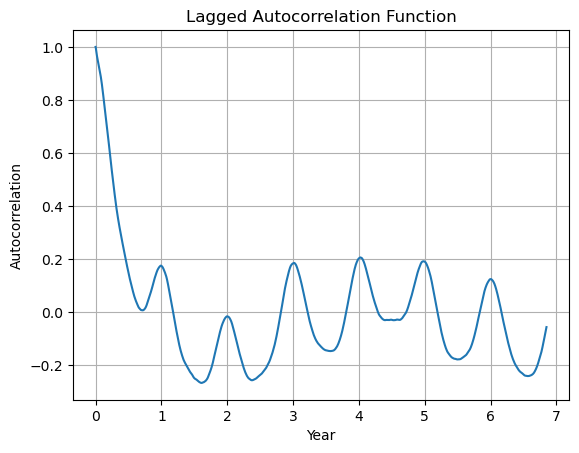

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Generate some sample data for the time series
x = np.arange(0,len(ccorregido))
y = enso_obs

# Compute the autocorrelation function (ACF)
max_lag = 2500  # Define the maximum lag to compute ACF for
acf_values, confint = acf(y, nlags=max_lag, fft=False, alpha=0.05)

# Plot the lagged autocorrelation function
lags = np.arange(0, 2500 + 1)/365 # Define the range of lags 
plt.plot(lags, acf_values[:])  # Omit the first element which is always 1
plt.xlabel('Year')
plt.ylabel('Autocorrelation')
plt.title('Lagged Autocorrelation Function')
plt.grid(True)
plt.show()

In [10]:
porcentaje_vecinos = fd.porcentaje_falsos_vecinos(nino_filtrado)
porcentaje_vecinos

El porcentaje de falsos vecinos es: 0.1499510603588907
1
El porcentaje de falsos vecinos es: 0.00039151712887438824
1


[0.9889070146818923, 0.1499510603588907, 0.00039151712887438824, 0.0, 0.0]

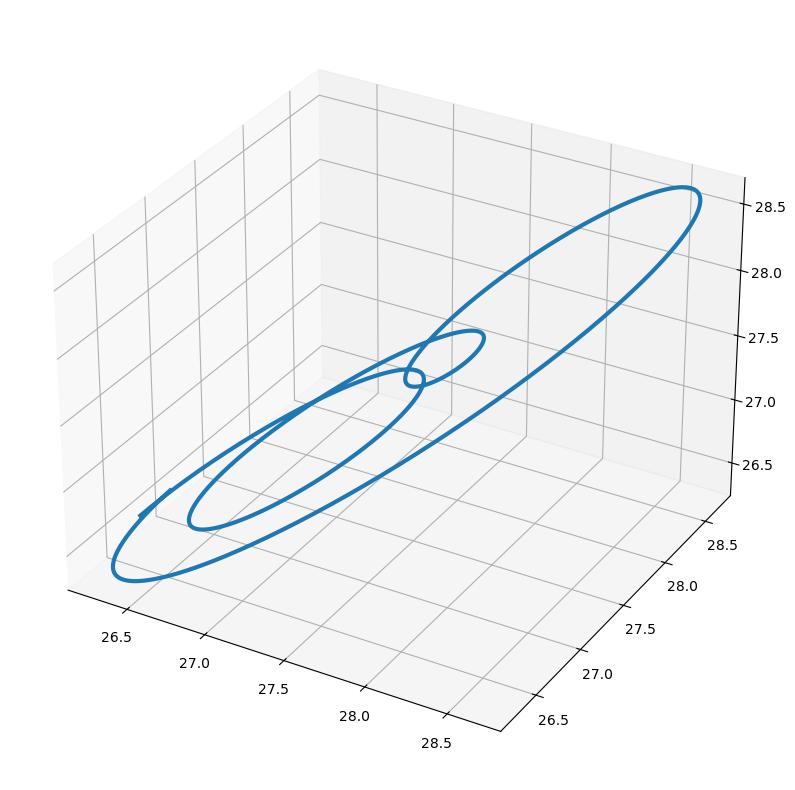

In [8]:
df = fd.embedding(15,np.array(nino_filtrado))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][2920:4000], df[1][2920:4000], df[2][2920:4000],linewidth=3)

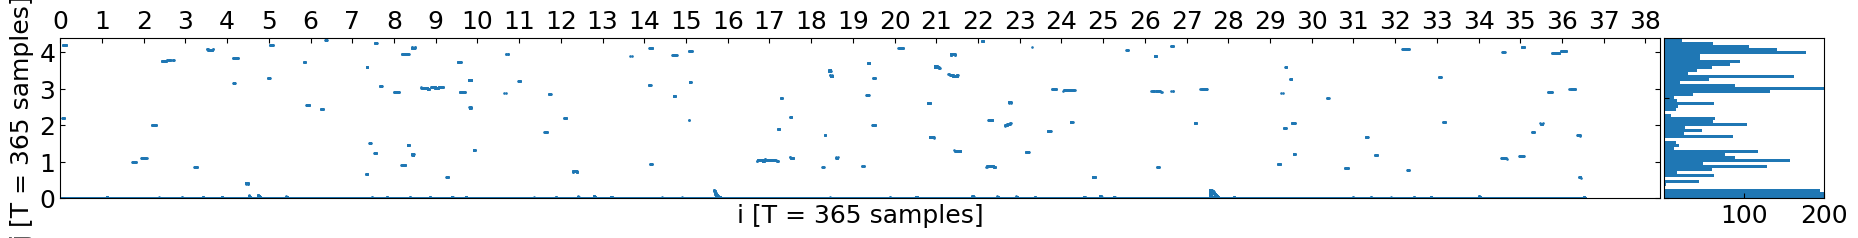

In [345]:

def close_returns(senal):
    """Calcula el mapa de close returns
    entrada: senial (np.array 1D)
    salida: matriz (i,p) con los close returns (np.array 2D)
    """
    cr =  np.zeros((len(senal),2000)) #cr de close returns
    eps = (np.max(senal)-np.min(senal))*0.001
    for j in range(2000):
      for i in range(len(senal)-2000):
        if (np.abs(senal[i+j] - senal[i]) < eps) and (np.abs(senal[i+j+4] - senal[i+4]) < eps):
          cr[i,j] = 1
    return cr

def find_indices(matrix):
    """Genera los indices x,y de las posiciones de los unos en la matriz
    de close returns
    entrada: matriz (np.array 2D)
    salida: lista con la posicion (x,y) de cada uno (list)
    """
    indices = np.where(matrix == 1)
    return list(zip(indices[0], indices[1]))

# Plot close returns-----------------------------
def close_returns_for_plot(senal):
    """Overkill mal pero genera arrays a partir de la lista de (x,y)
    entrada: lista (x,y) de los close returns (list)
    salida: vectores x, y (dos np.array)
    """
    cr = close_returns(senal)
    result = find_indices(cr)
    x = []
    y = []
    for m in result:
        x.append(m[0])
        y.append(m[1])
        
    return x, y


x, y = close_returns_for_plot(nino_filtrado)
# plot
fig = figure_cr(x,y,1600,14000,200)

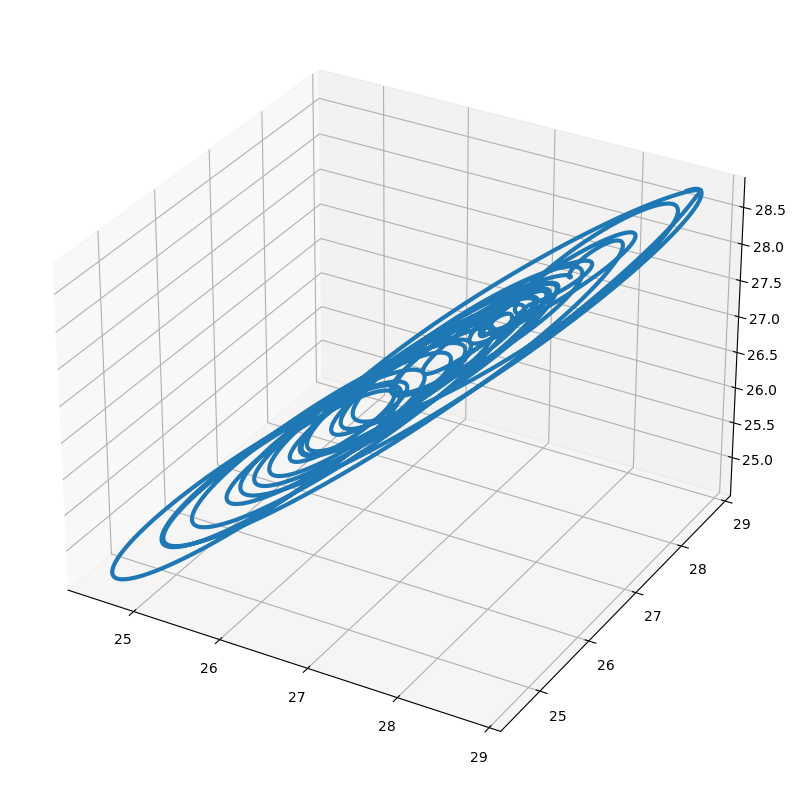

In [303]:
df = fd.embedding(15,np.array(nino_filtrado))
ini = 1
leng = 10000
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][int(ini*365):int(ini*365)+leng], df[1][int(ini*365):int(ini*365)+leng], df[2][int(ini*365):int(ini*365)+leng],linewidth=3)

In [29]:

from datetime import datetime, timedelta

def daily_time_array(start_date, n):
    """Generate a daily time array starting from the specified date."""
    time_array = []
    current_date = start_date
    for _ in range(n):
        time_array.append(current_date)
        current_date += timedelta(days=1)
    return time_array

# Define the start date and the length of the time array
start_date = datetime(1982, 1, 1)  # Start date: January 1, 2024
n = 15340  # Length of the time array

# Generate the daily time array
time_array = daily_time_array(start_date, n)

time_array[4000]

datetime.datetime(1992, 12, 14, 0, 0)

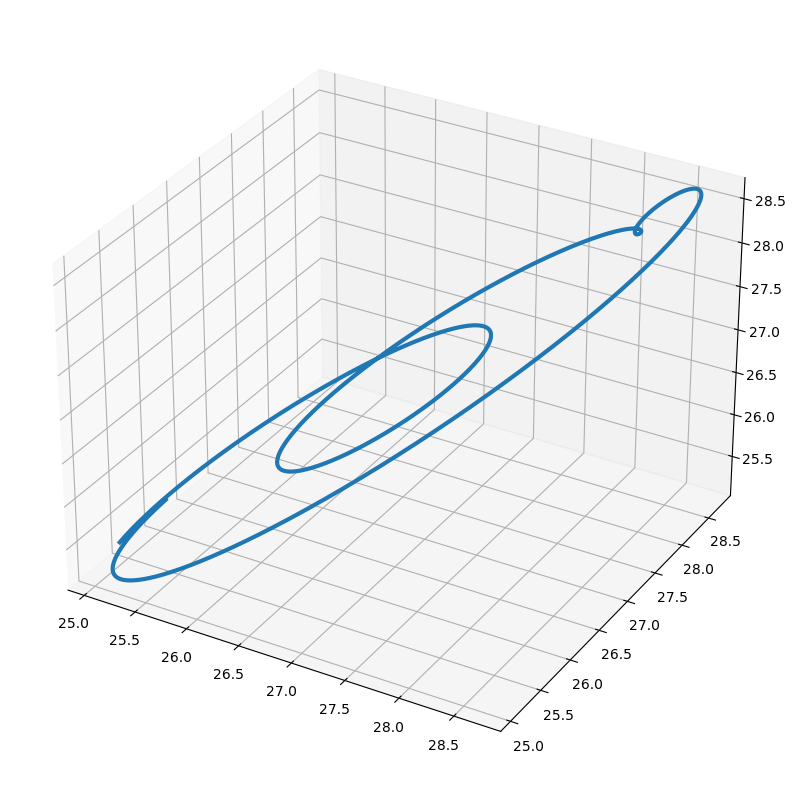

In [308]:
df = fd.embedding(15,np.array(corregido))
ini = 26
leng = 1100
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][int(ini*365):int(ini*365)+leng], df[1][int(ini*365):int(ini*365)+leng], df[2][int(ini*365):int(ini*365)+leng],linewidth=3)

(23.0, 31.0)

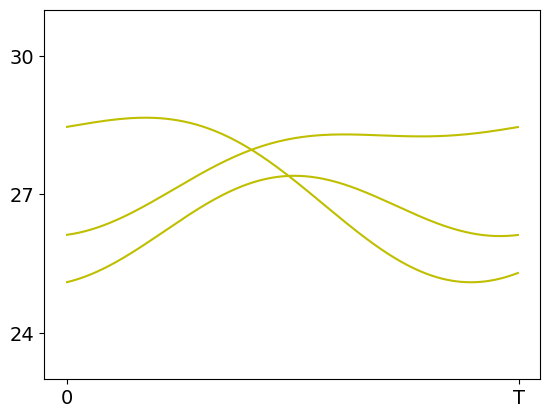

In [354]:
ini = 26
plt.plot(corregido[int(ini*365)+0*int(365):int(ini*365)+int(365)],color='y')
plt.plot(corregido[int(ini*365)+1*int(365):int(ini*365)+2*int(365)],color='y')
plt.plot(corregido[int(ini*365)+2*int(365):int(ini*365)+3*int(365)],color='y')
plt.yticks(np.array([24,27,30]),fontsize=14)
plt.xticks(np.array([0,365]),['0','T'],fontsize=14)
plt.ylim(23,31)

(23.0, 31.0)

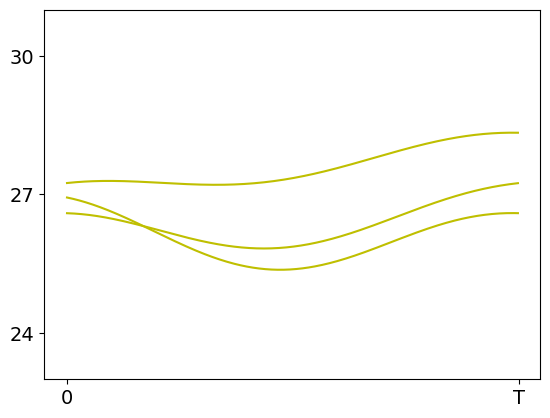

In [360]:
plt.figure()
ini = 900/365
plt.plot(nino_filtrado[int(900)+0*int(365):int(900)+int(365)],color='y')
plt.plot(nino_filtrado[int(900)+1*int(365):int(900)+2*int(365)],color='y')
plt.plot(nino_filtrado[int(900)+2*int(365):int(900)+3*int(365)],color='y')
plt.yticks(np.array([24,27,30]),fontsize=14)
plt.xticks(np.array([0,365]),['0','T'],fontsize=14)
plt.ylim(23,31)

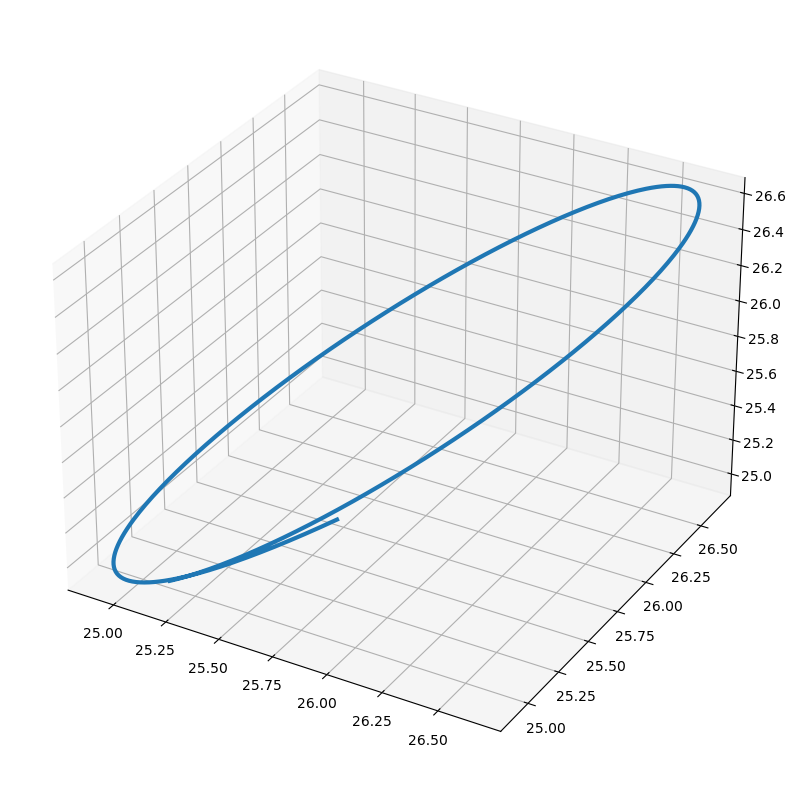

In [251]:
df = fd.embedding(15,np.array(nino_filtrado))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][6080:6500], df[1][6080:6500], df[2][6080:6500],linewidth=3)

In [341]:
2019 + 4.3

2023.3

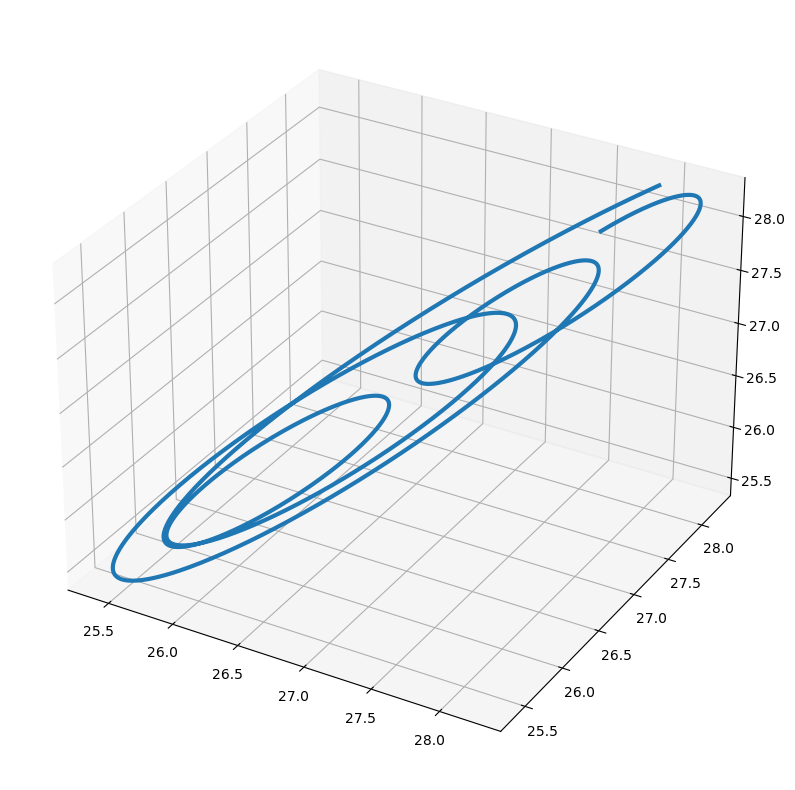

In [338]:
df = fd.embedding(15,np.array(nino_filtrado))
per4 = int(4.3*365)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][13540:13540+per4], df[1][13540:13540+per4], df[2][13540:13540+per4],linewidth=3)


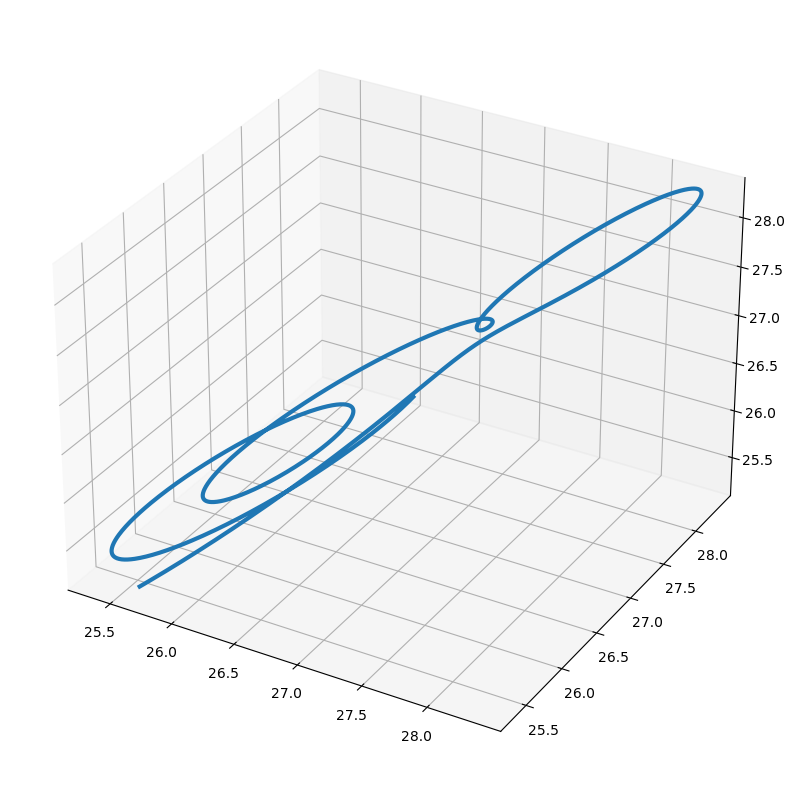

In [309]:
df = fd.embedding(15,np.array(nino_filtrado))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df[0][900:2400], df[1][900:2400], df[2][900:2400],linewidth=3)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

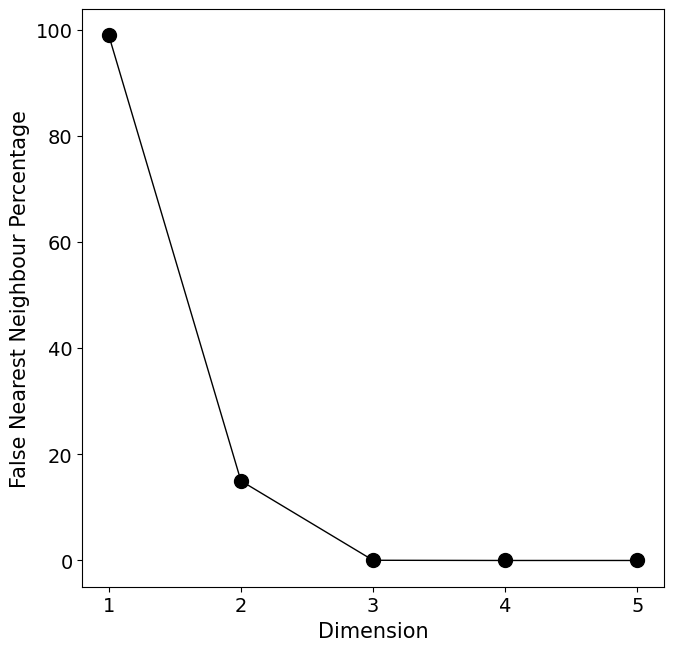

In [217]:
#porcentaje_vecinos = porcentaje_falsos_vecinos(corregido)

plt.figure(figsize=(7.5,7.5))
plt.plot(np.arange(1,6), np.array(porcentaje_vecinos)*100, '.-', color='k', lw=1, markersize=20)
plt.xlabel("Dimension", fontsize=15)
plt.xticks(np.arange(1,6), fontsize=14)
plt.ylabel("False Nearest Neighbour Percentage", fontsize=15)
plt.yticks(fontsize=14)

In [316]:


señal=nino_filtrado[1:len(nino_filtrado):36]/max(nino_filtrado)
print('entropia y complejidad   ' + str(fd.entropia_y_complejidad_wootters(señal,5)))

entropia y complejidad   (0.5109488366257849, 0.4094722376337334)


CESM1

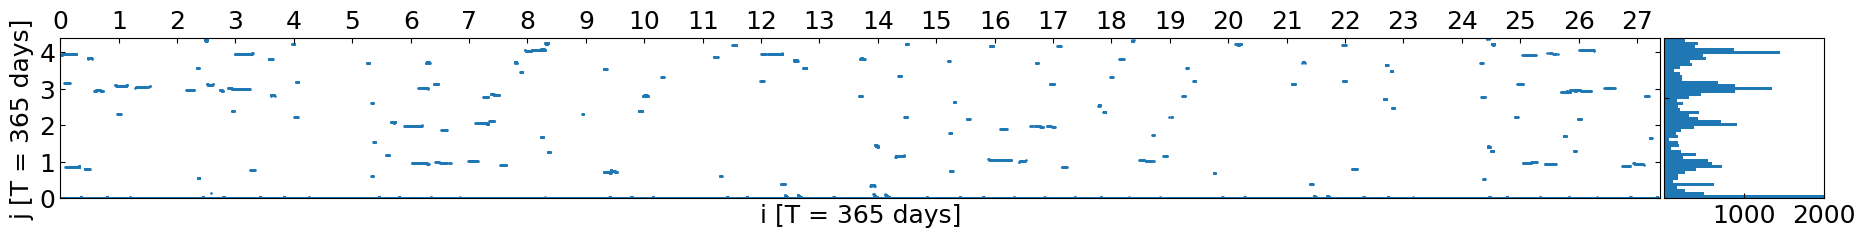

In [21]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_1.csv', header=0)
serie = NINO['NINO_CESM2_1']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
#x, y = fd.close_returns_for_plot(corregido)
# plot
fig = figure_cr(x,y,1600,10000,2000)

El porcentaje de falsos vecinos es: 0.9794486215538847
19
El porcentaje de falsos vecinos es: 0.10827067669172932
6
El porcentaje de falsos vecinos es: 0.0001670843776106934
1
El porcentaje de falsos vecinos es: 0.0001670843776106934
1
El porcentaje de falsos vecinos es: 0.0001670843776106934
1


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

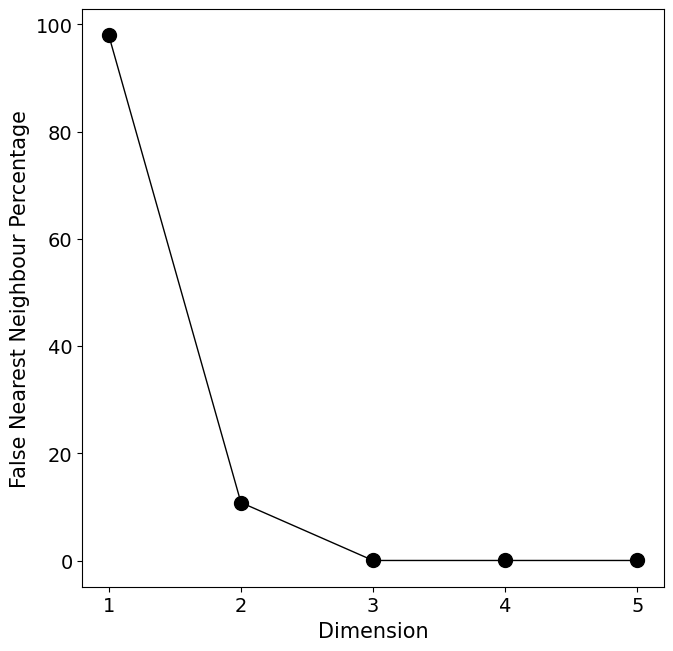

In [43]:
porcentaje_vecinos = porcentaje_falsos_vecinos(out[:6000])

plt.figure(figsize=(7.5,7.5))
plt.plot(np.arange(1,6), np.array(porcentaje_falsos_vecinos)*100, '.-', color='k', lw=1, markersize=20)
plt.xlabel("Dimension", fontsize=15)
plt.xticks(np.arange(1,6), fontsize=14)
plt.ylabel("False Nearest Neighbour Percentage", fontsize=15)
plt.yticks(fontsize=14)

CESM2

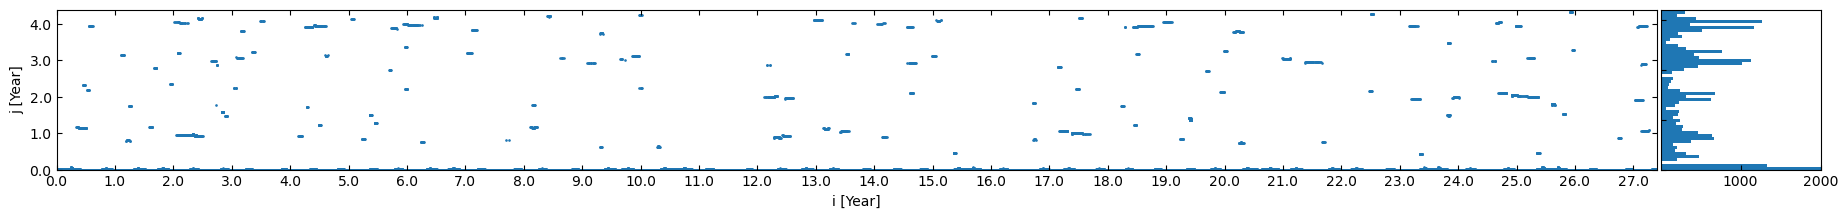

In [3]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_2.csv', header=0)
serie = NINO['NINO_CESM2_2']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000) 

CESM3

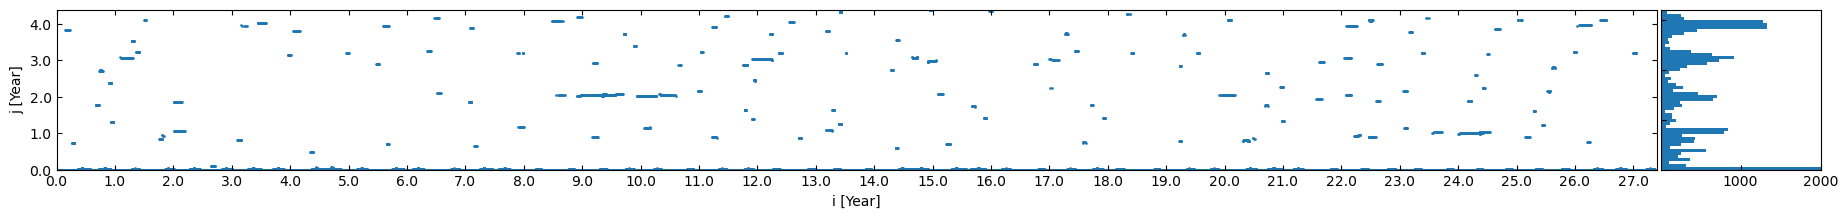

In [4]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_3.csv', header=0)
serie = NINO['NINO_CESM2_3']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)

CESM4

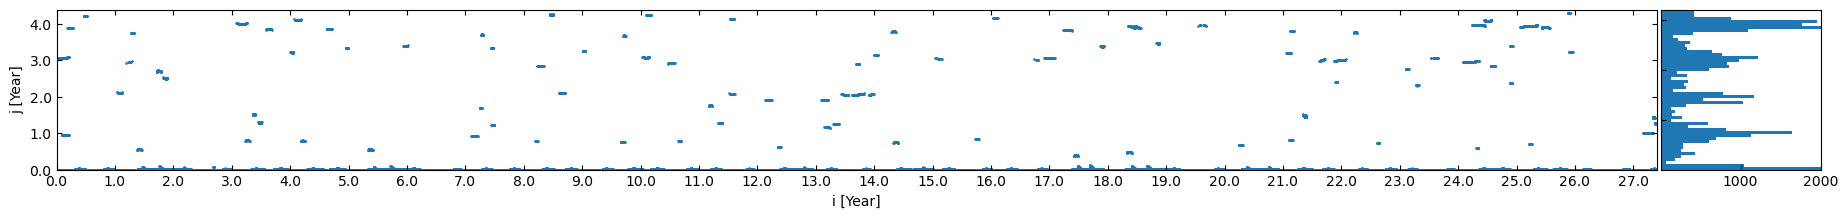

In [5]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_4.csv', header=0)
serie = NINO['NINO_CESM2_4']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000) 

CESM5

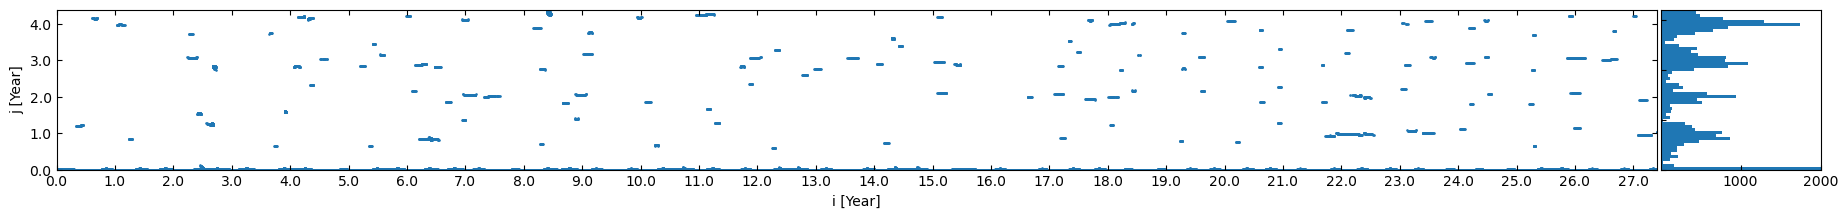

In [6]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_5.csv', header=0)
serie = NINO['NINO_CESM2_5']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)  

CESM2 6

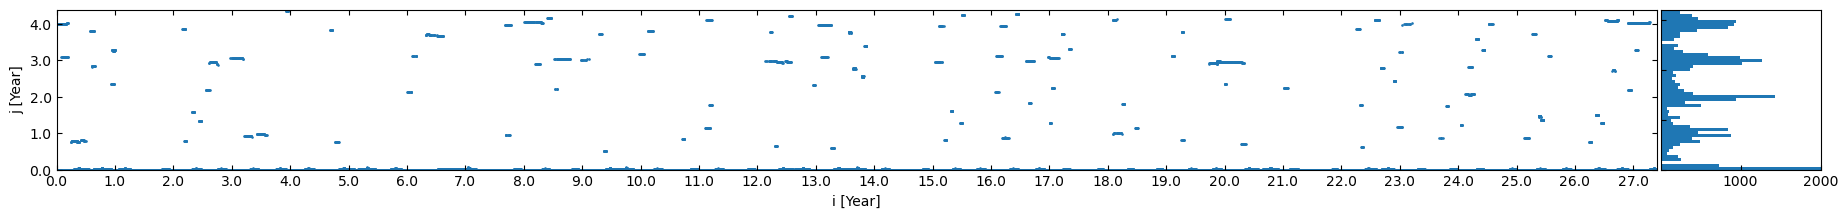

In [7]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_6.csv', header=0)
serie = NINO['NINO_CESM2_6']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000) 

CESM2 7

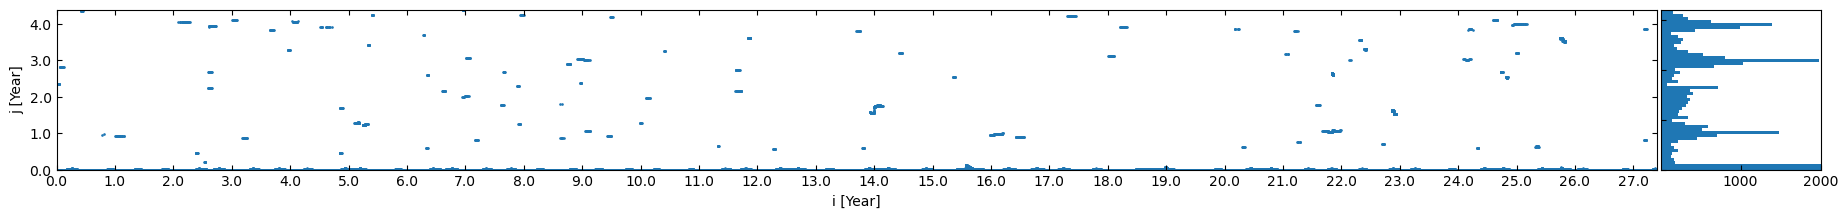

In [8]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_7.csv', header=0)
serie = NINO['NINO_CESM2_7']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)

CEMS2 8

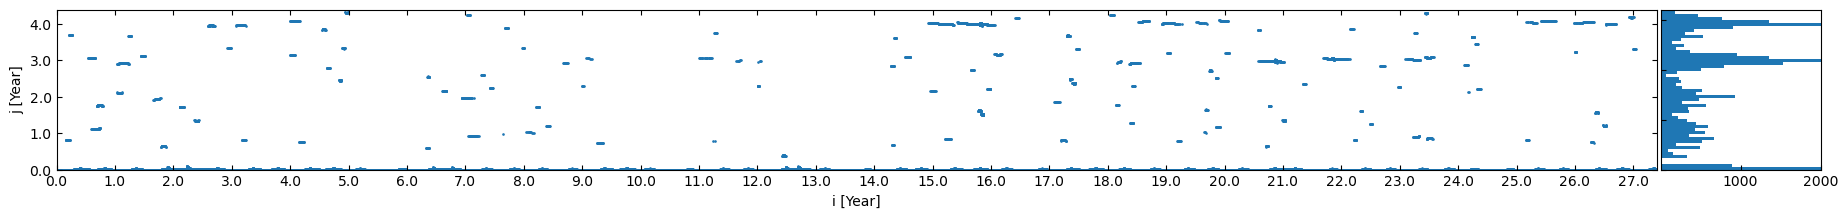

In [9]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_8.csv', header=0)
serie = NINO['NINO_CESM2_8']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)

CESM2 9

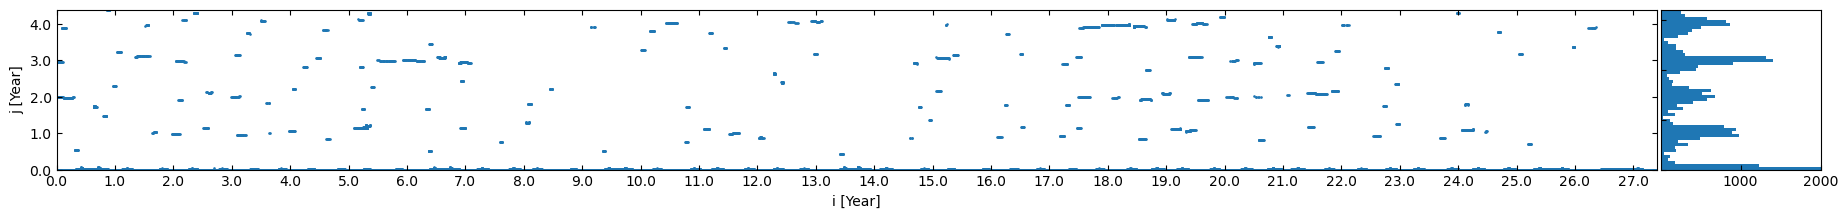

In [10]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_9.csv', header=0)
serie = NINO['NINO_CESM2_9']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)

CESM2 10

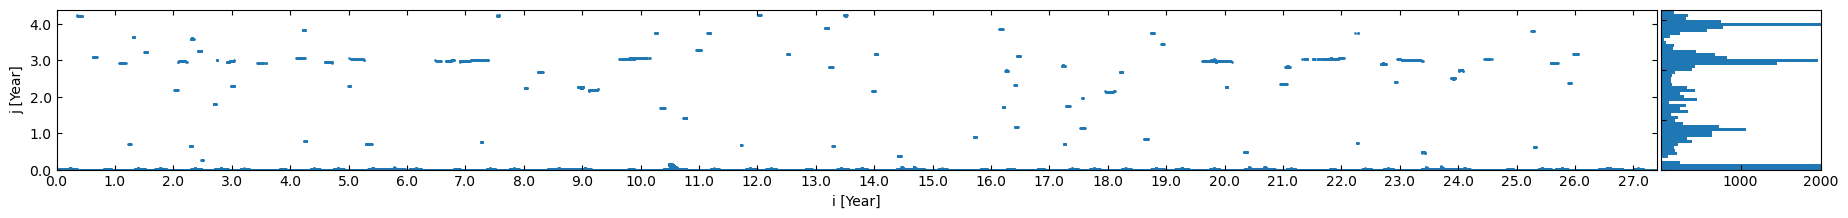

In [11]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_10.csv', header=0)
serie = NINO['NINO_CESM2_10']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)
 

CESM2 11

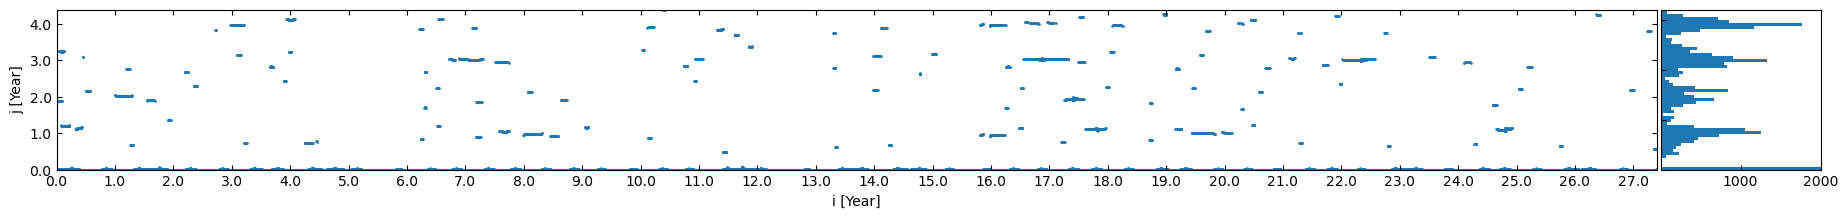

In [12]:
path = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_11.csv', header=0)
serie = NINO['NINO_CESM2_11']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
x, y = fd.close_returns_for_plot(corregido)
# plot
fig = fd.figure_cr(x,y,1600,10000,2000)
  

A = 7.5, w = 4.7

25


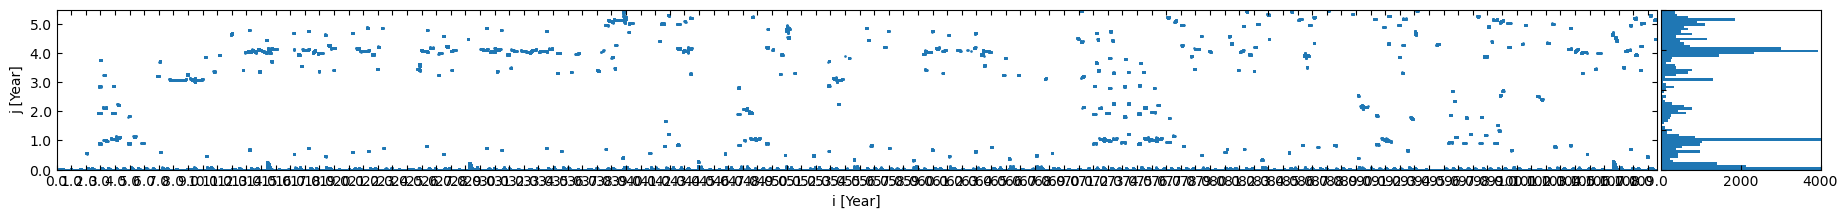

In [13]:
path_integraciones = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
lista2=[]
lista2=glob.glob(path_integraciones+'/periodo4_masruido/*.txt')
lista2.sort()

print(len(lista2))
datos = []
for file in lista2:
  datos.append(np.loadtxt(file))
  
x, y = fd.close_returns_for_plot(datos[0])
fig = fd.figure_cr(x,y,2000,40000,4000)

In [3]:
path_integraciones = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
lista3=[]
lista3=glob.glob(path_integraciones+'/periodo4/*.txt')
lista3.sort()

print(len(lista3))
datos = []
for file in lista3:
  datos.append(np.loadtxt(file))

#x, y = fd.close_returns_for_plot(datos[0][:15000])
#fig = fd.figure_cr(x,y,2000,15000,4000)

0


In [15]:
counts, binEdges=np.histogram(y,bins=100)
binEdges[np.argmax(counts[1:])]/365

3.9979999999999998

25


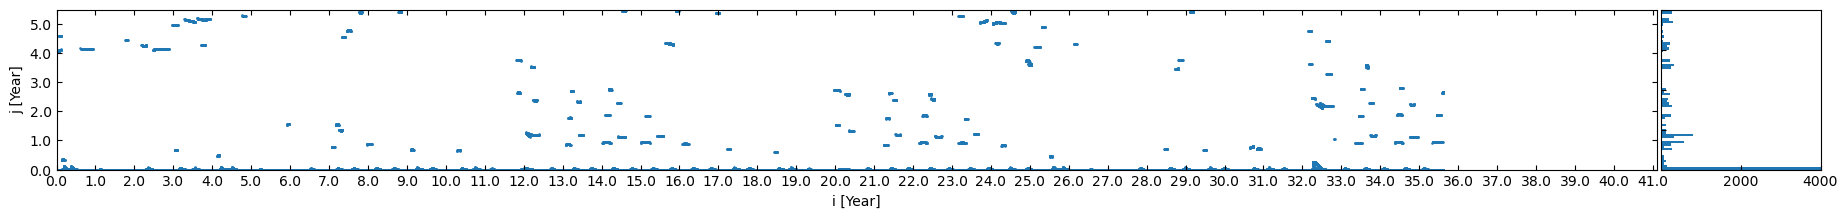

In [16]:
path_integraciones = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
lista4=[]
lista4=glob.glob(path_integraciones+'/cerca_periodo4_caos/*.txt')
lista4.sort()

print(len(lista4))
datos = []
for file in lista4:
  datos.append(np.loadtxt(file))
  
x, y = fd.close_returns_for_plot(datos[0][:15000])
fig = fd.figure_cr(x,y,2000,15000,4000)


A = 11.5, w=3.5 

In [4]:
import numpy as np
import random

def rk4(dv,v,n,t,dt,e1):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v


def ecuaciones(v, dv,eps1):
    """Defino la ecuacion diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    A, eps2,omega = 10,1,4.4 #Cerca de la lengua de arnold de periodo 4, pero donde hay caos
    #A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    cont=0
    while t<t_max:
        eps1 = 0.2 #*(1+0.5*random.normalvariate(0,0.5))
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACa ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    out = x[:60000]

In [91]:
2*np.pi/3.5 /0.0036

498.66550056980844

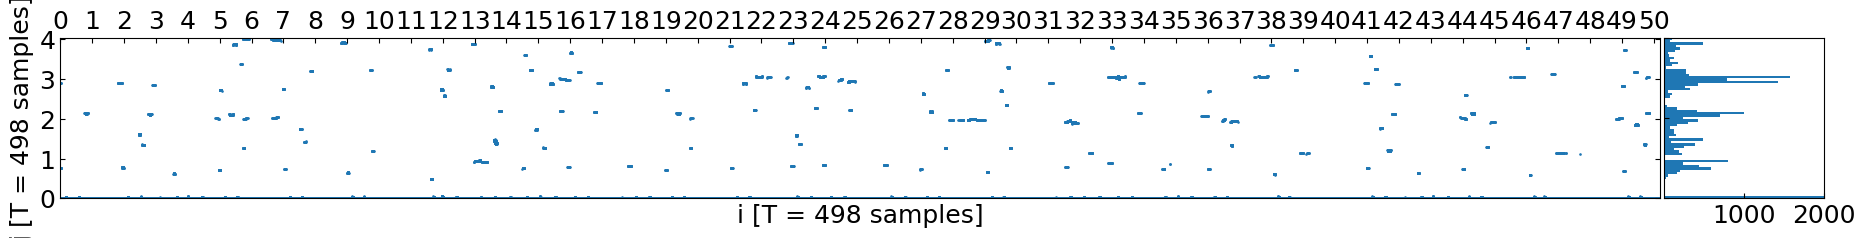

In [98]:
#x, y = fd.close_returns_for_plot(out[:])
fig = figure_cr(x[:],y[:],2000,25000,2000)

<Axes3D: >

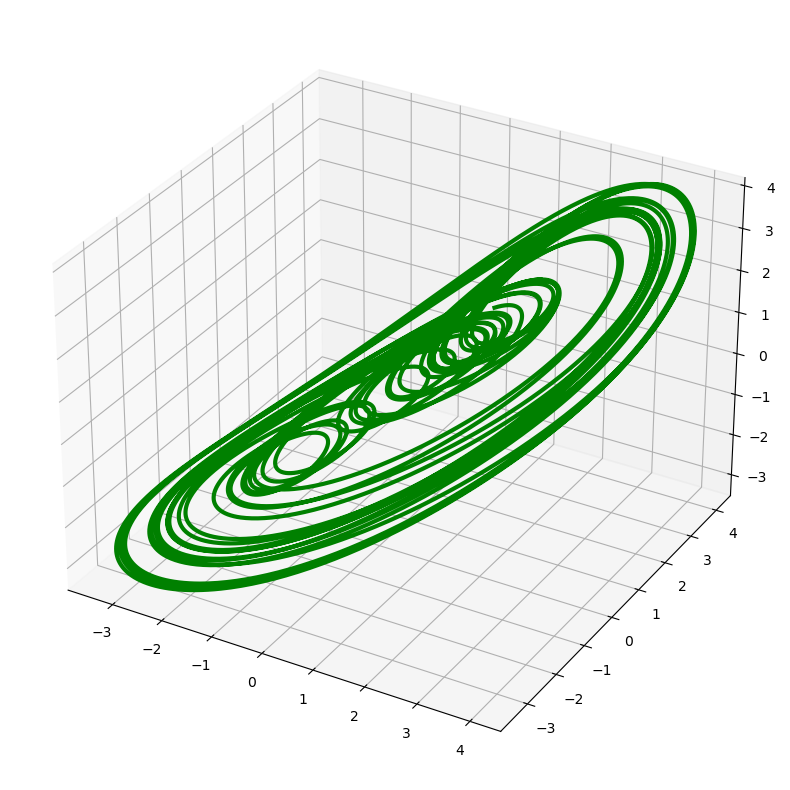

In [54]:
df = fd.embedding(30,np.array(x))
plot_orbita(df,0,20000,-r)

In [ ]:
plt.plot()

A = 11.5, w=3.5 con ruido en los parametros

In [56]:
path_integraciones = '/Users/juliamindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos'
lista=[]
lista=glob.glob(path_integraciones+'/cerca_periodo4_caos_ruido/*.txt')
datos=np.loadtxt(lista[1])

In [344]:
#x, y = fd.close_returns_for_plot(datos[0][:60000])
def figure_cr(x,y,ylim=1600,xlim=15000,hist_lim=1000):
    
    # definitions for the axes
    left, width = 0.1, 2
    bottom, height = 0.1, 0.2
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    fig = plt.figure(figsize=(8, 8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)    
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(x, y,s=0.8)

    # now determine nice limits by hand:
    binwidth = 0.25
    lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
    ax_scatter.set_xlim((0, xlim))
    ax_scatter.set_ylim((0, ylim))

    # Format the x-axis labels
    ax_scatter.set_yticks(np.arange(0,ylim,365))
    xtick_ylim = np.ceil(ylim/365)
    ax_scatter.set_yticklabels(np.arange(0,xtick_ylim,1).astype(int))
    ax_scatter.set_xticks(np.arange(0,xlim,365))
    xtick_xlim = np.ceil(xlim/365)
    ax_scatter.set_xticklabels(np.arange(0,xtick_xlim,1).astype(int))
    # Rotate the x-axis labels for better readability (optional)

    # Add labels and title as needed
    ax_scatter.set_xlabel('i [T = 365 samples]',fontsize=18)
    ax_scatter.set_ylabel('j [T = 365 samples]',fontsize=18)

    bins = np.arange(0, ylim + 30, 30)
    #ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal') #
    #ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    ax_histy.set_xlim(1,hist_lim)
    ax_scatter.xaxis.set_ticks_position('top')
    ax_scatter.tick_params(axis='both', labelsize= 18)
    ax_histy.tick_params(axis='both', labelsize= 18)

    return fig    

#fig = figure_cr(x[:],y[:],2000,15000,1000)

In [121]:
def plot_orbita(df,inicio,fin,color='-g'):
  """                                                                                                                                                    
  Scaling is done from here...                                                                                                                           
  """
  x_scale=1
  y_scale=1
  z_scale=1

  scale=np.diag([x_scale, y_scale, z_scale, 1.0])
  scale=scale*(1.0/scale.max())
  scale[3,3]=1.2

  def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

  fig = plt.figure(figsize=(10,12),dpi=300)
  ax = fig.add_subplot(111, projection='3d')
  ax.get_proj=short_proj
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color,linewidth=2)
  ax.set_xlim(-4,4)
  ax.set_ylim(-4,4)
  ax.set_zlim3d(-4,4)
  ax.set_xticks([-3, 0, 3])
  ax.set_yticks([-3, 0, 3])
  ax.set_zticks([-3, 0, 3])
  ax.tick_params(axis='both', labelsize= 18)
  ax.set_xlabel(r'x$_{obs}$(t)',fontsize=20)
  ax.set_ylabel(r'x$_{obs}$(t-$\tau$)',fontsize=20)
  ax.set_zlabel(r'x$_{obs}$(t-2$\tau$)',fontsize=20)
  ax.set_title('a     b     c      d      e     f ',fontsize=30)
  return ax

def embedding(tau,dato):
     w = 3
     tau = tau
     embedding = dato[(np.arange(w)*(tau+1))+ np.arange(np.max(dato.shape[0] - (w-1)*(tau+1), 0)).reshape(-1,1)]
     dim1 = embedding[:,0]
     dim2 = embedding[:,1]
     dim3 = embedding[:,2]
     return dim1, dim2, dim3
 

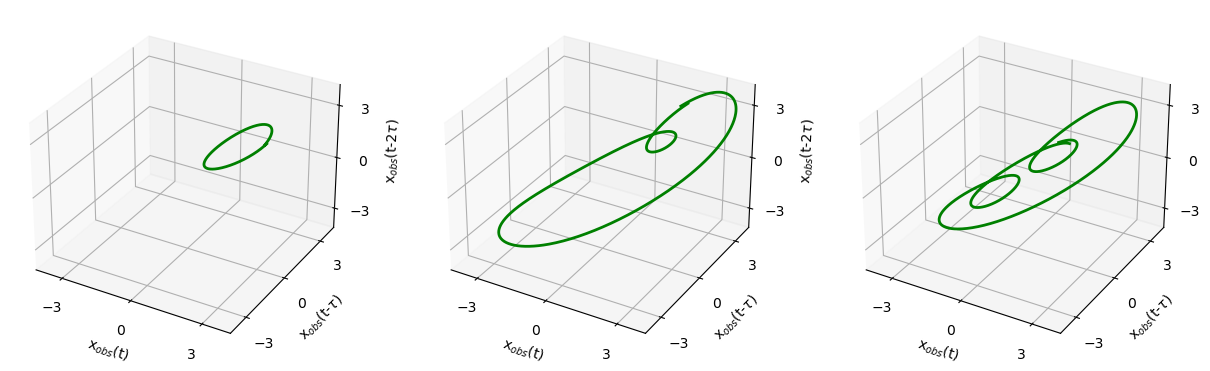

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = embedding(30,np.array(out))
inicio1 = 27*365+280;fin1 =29*365+10
inicio2 = 20*365+120; fin2 =23*365
inicio3 = 0 ; fin3 = 4*365+100
# Create a figure with three 3D subplots
fig = plt.figure(figsize=(12, 6))


color = 'g'
# Plot 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(df[0][inicio1:fin1], df[1][inicio1:fin1], df[2][inicio1:fin1],color,linewidth=2)
ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)
ax1.set_zlim3d(-4,4)
ax1.set_xticks([-3, 0, 3])
ax1.set_yticks([-3, 0, 3])
ax1.set_zticks([-3, 0, 3])
ax1.set_xlabel(r'x$_{obs}$(t)')
ax1.set_ylabel(r'x$_{obs}$(t-$\tau$)')
ax1.set_zlabel(r'x$_{obs}$(t-2$\tau$)')

# Plot 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(df[0][inicio2:fin2], df[1][inicio2:fin2], df[2][inicio2:fin2],color,linewidth=2)
ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)
ax2.set_zlim3d(-4,4)
ax2.set_xticks([-3, 0, 3])
ax2.set_yticks([-3, 0, 3])
ax2.set_zticks([-3, 0, 3])
ax2.set_xlabel(r'x$_{obs}$(t)')
ax2.set_ylabel(r'x$_{obs}$(t-$\tau$)')
ax2.set_zlabel(r'x$_{obs}$(t-2$\tau$)')

# Plot 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(df[0][inicio3:fin3], df[1][inicio3:fin3], df[2][inicio3:fin3],color,linewidth=2)
ax3.set_xlim(-4,4)
ax3.set_ylim(-4,4)
ax3.set_zlim3d(-4,4)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])
ax3.set_zticks([-3, 0, 3])
ax3.set_xlabel(r'x$_{obs}$(t)')
ax3.set_ylabel(r'x$_{obs}$(t-$\tau$)')
ax3.set_zlabel(r'x$_{obs}$(t-2$\tau$)')
plt.subplots_adjust(left=0.01, right=0.99, wspace=0.2)
plt.show()


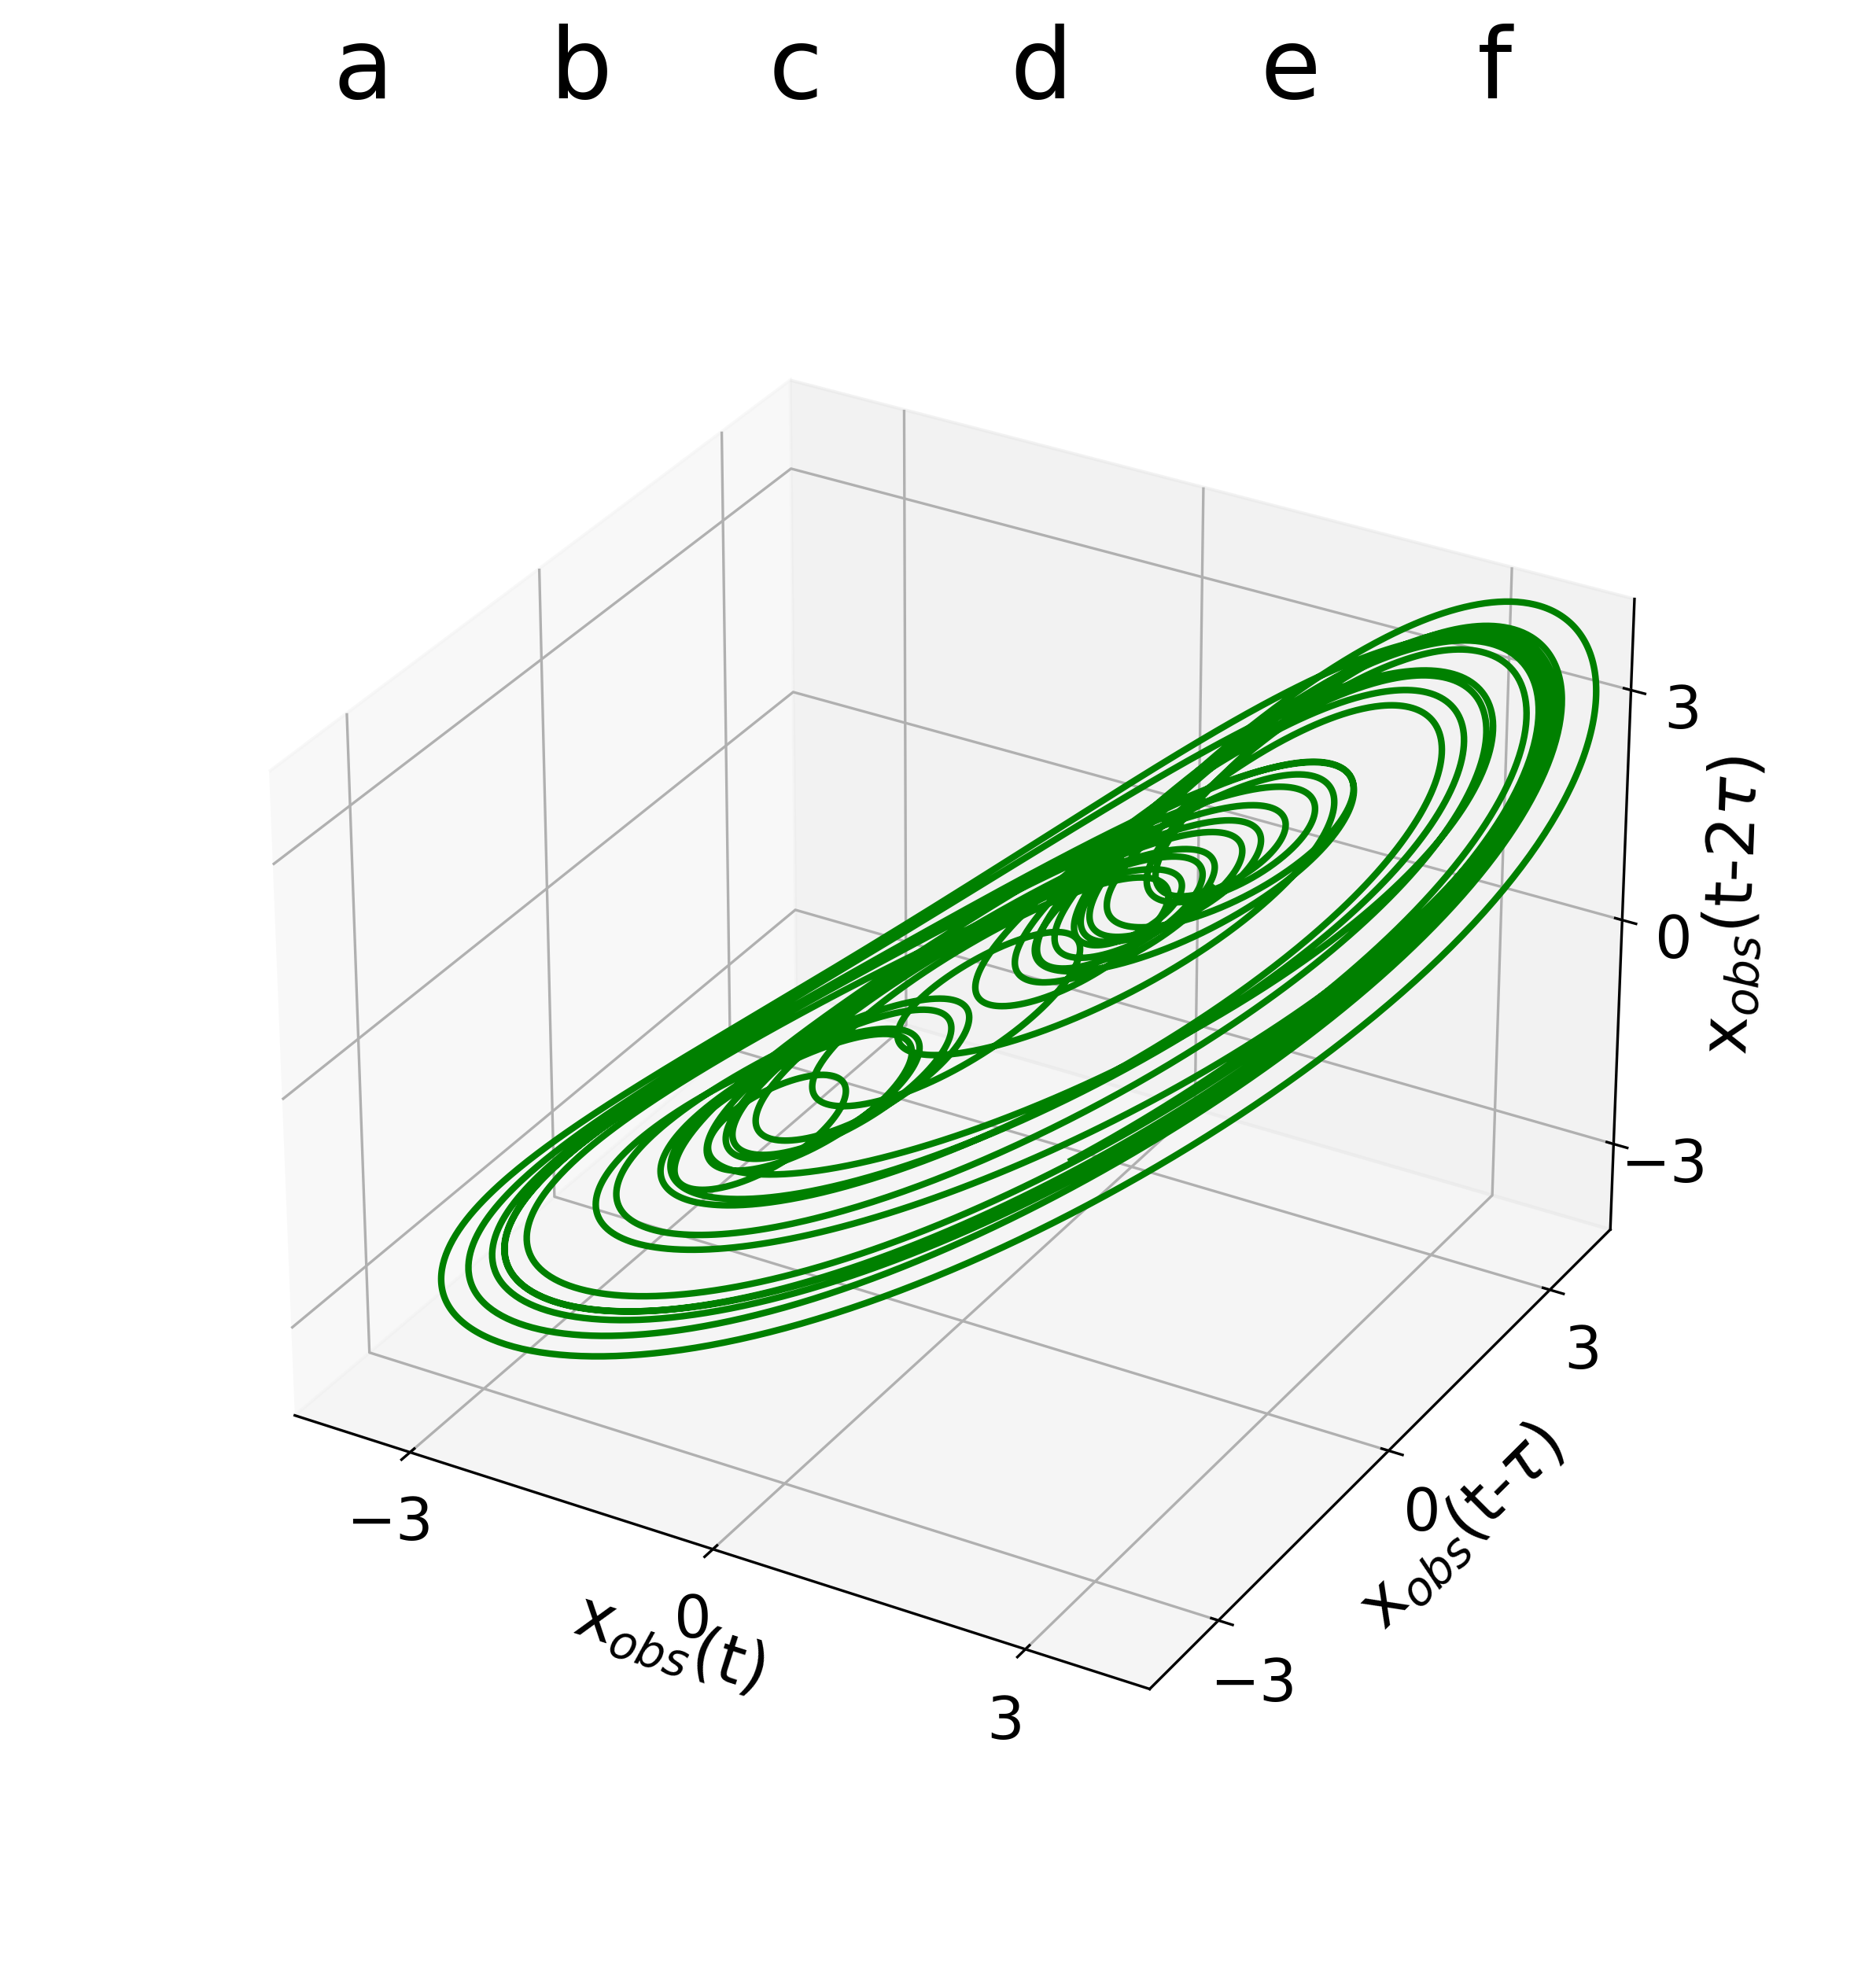

In [177]:

fig = plot_orbita(df,0*365+120,40*365)
plt.savefig('atractor_caos_ruido.png', bbox_inches="tight")

<Axes3D: >

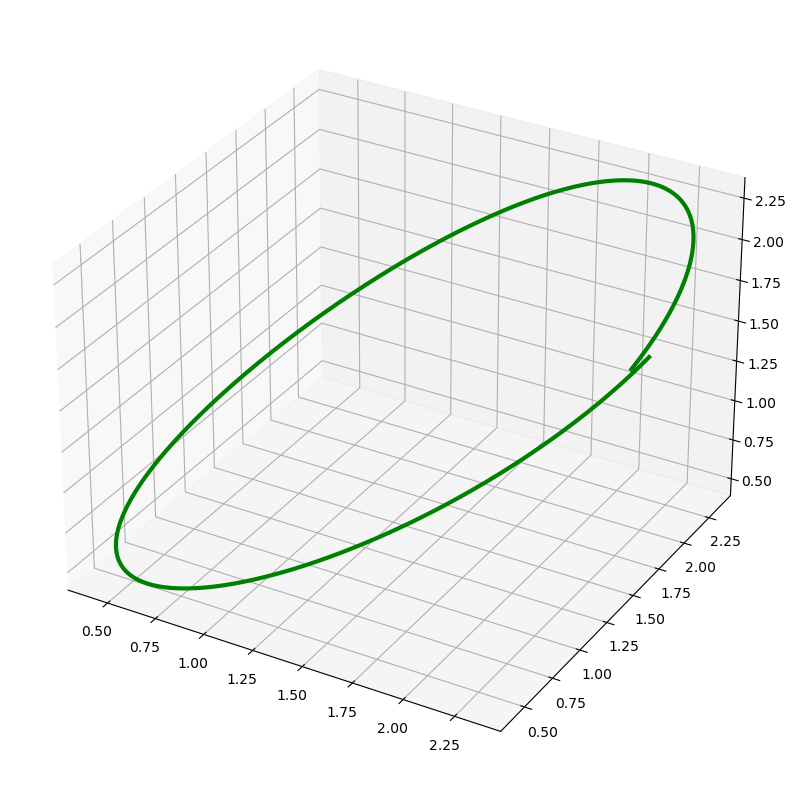

In [96]:
df = fd.embedding(30,np.array(out))

plot_orbita(df,27*365+280,29*365+10)

<Axes3D: >

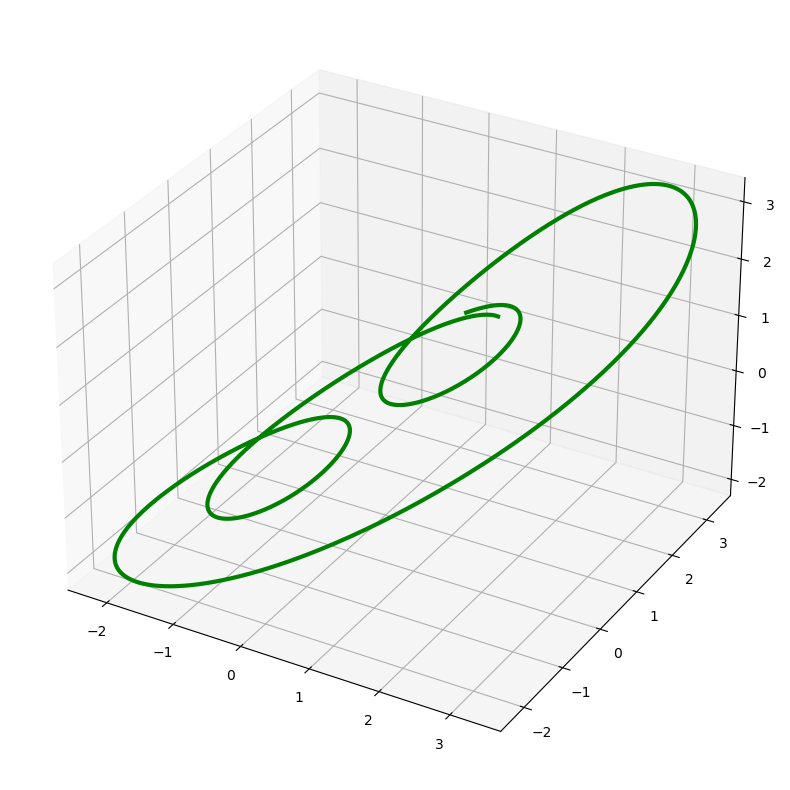

In [97]:
df = fd.embedding(30,np.array(out))
plot_orbita(df,0*365,4*365+100)

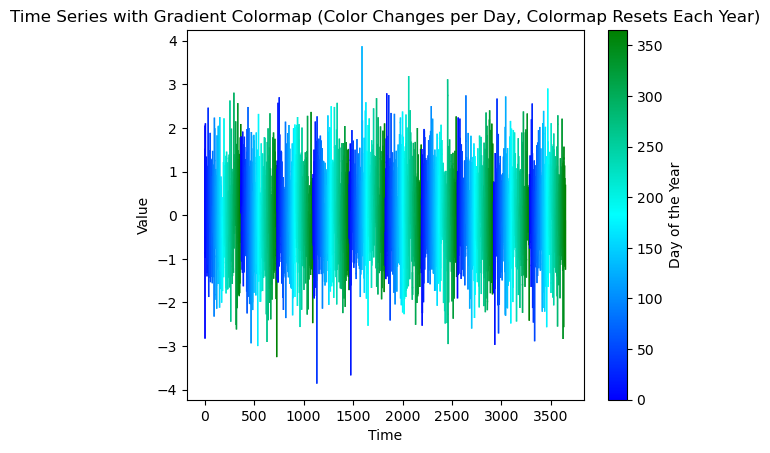

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate some sample data (assuming 3650 samples for 10 years)
num_samples = 3650
x = np.arange(num_samples)
y = np.random.randn(num_samples)

# Define colors for the gradient colormap
colors = [(0, 'blue'), (0.5, 'cyan'), (1, 'green')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot the time series with gradient colormap
fig, ax = plt.subplots()
for i in range(num_samples):
    ax.plot(x[i:i+2], y[i:i+2], color=cmap(i % 365 / 365), linewidth=1)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=365))
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Day of the Year')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Time Series with Gradient Colormap (Color Changes per Day, Colormap Resets Each Year)')

plt.show()